In [1]:
from dl_utils import visualize_model, compile_and_fit

In [ ]:
import keras
import tensorflow as tf

In [7]:
def preprocess_util(images_dataset):
    floating = images_dataset.astype('float32')
    normalized = floating / 255.0
    flattened = normalized.reshape(len(images_dataset),-1)
    return flattened

In [9]:
(training_images, training_labes), (testing_images, testing_labels) = \
    keras.datasets.fashion_mnist.load_data()

training_images = preprocess_util(training_images)
testing_images = preprocess_util(testing_images)

In [17]:
model = keras.models.Sequential([
    keras.layers.Input((784,),name="Input_Layer"),
    keras.layers.Dense(2, activation='relu',name="Hidden_Layer_1"),
    keras.layers.Dense(10, activation='softmax', name = "Output_Layer")
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
visualize_model(model)

WindowsPath('model.png')

In [21]:
history = model.fit(
    training_images, training_labes,
    epochs=5,
    validation_data=(testing_images, testing_labels),
    verbose = 1 # to display the logs while training
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6856 - loss: 0.9073 - val_accuracy: 0.6842 - val_loss: 0.8976
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6891 - loss: 0.8878 - val_accuracy: 0.6961 - val_loss: 0.8818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6969 - loss: 0.8722 - val_accuracy: 0.6987 - val_loss: 0.8727
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7038 - loss: 0.8501 - val_accuracy: 0.6998 - val_loss: 0.8565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7071 - loss: 0.8436 - val_accuracy: 0.7080 - val_loss: 0.8499


In [23]:
history.history

{'accuracy': [0.6867666840553284,
  0.6950333118438721,
  0.7002500295639038,
  0.703000009059906,
  0.7092166543006897],
 'loss': [0.8978221416473389,
  0.8779996633529663,
  0.8652474880218506,
  0.8521883487701416,
  0.8413501381874084],
 'val_accuracy': [0.6841999888420105,
  0.6960999965667725,
  0.6987000107765198,
  0.6998000144958496,
  0.7080000042915344],
 'val_loss': [0.8975990414619446,
  0.8817833065986633,
  0.8727054595947266,
  0.8565444350242615,
  0.8499143719673157]}

In [24]:
import matplotlib.pyplot as plt

In [30]:
history = history.history

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


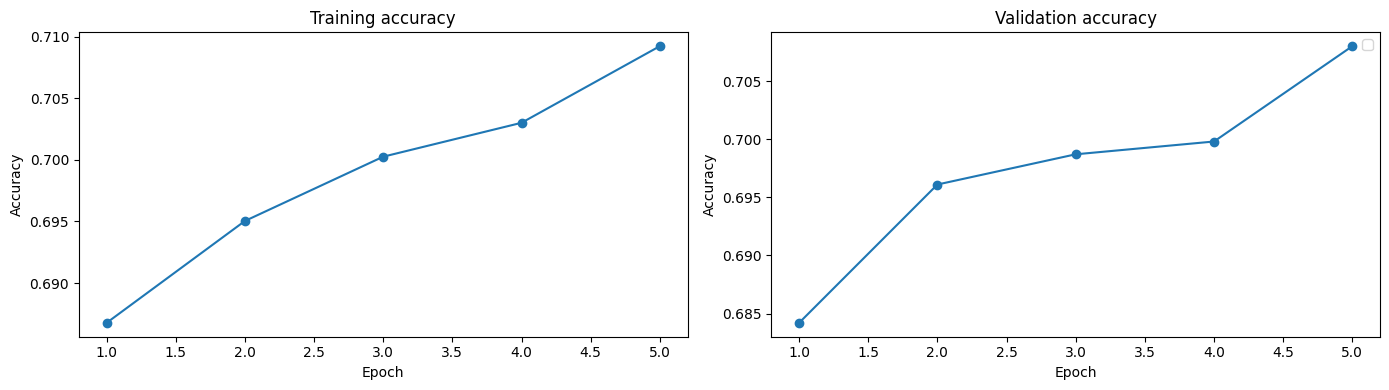

In [31]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
epochs = range(1, len(history["accuracy"]) + 1)
axes[0].plot(epochs, history["accuracy"], marker="o")
axes[1].plot(epochs, history["val_accuracy"], marker="o")

axes[0].set_title("Training accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")

axes[1].set_title("Validation accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
plt.tight_layout()
plt.show()